# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import missingno as msng

# Agenda—To distill and articulate data-derived insights in a manner that is easily comprehensible for Stakeholders without a technical background

# Importing Dataset

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')

In [3]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


# Basic Data Cleaning and Wrangling

## Dealing With Null Values
- Find out columns which contain Null Values
- Find out the percentage of Null Values
- Create a Reference Data Reference Dataset and match values from that dataset
- If there are Still Null Values, then it's better to delete them or impute them (depends on dataset)
### Insights on Null Values
- Only two columns Source_Name, Destination_Name have Null Values 
- Only 0.2 percent and 0.18 percent of data from Source_Name, Destination_Name have Null Values, It can still be mapped  

Deleting irrelevant columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [5]:
df.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],inplace=True)

Getting Columns with Null Values

In [6]:
df.columns[df.isna().any()]

Index(['source_name', 'destination_name'], dtype='object')

Getting Percentage of Null Values

In [8]:
(df.isna().sum()/df.shape[0] *100).reset_index().rename({0: "miss_perc"},axis = 1)

,index,miss_perc
0,data,0.000000
1,trip_creation_time,0.000000
2,route_schedule_uuid,0.000000
3,route_type,0.000000
4,trip_uuid,0.000000
5,source_center,0.000000
6,source_name,0.202254
7,destination_center,0.000000
8,destination_name,0.180165
9,od_start_time,0.000000


Getting A visual representation of Columns with Null Values, and whether there is a Correlation b/w or not

<Axes: >

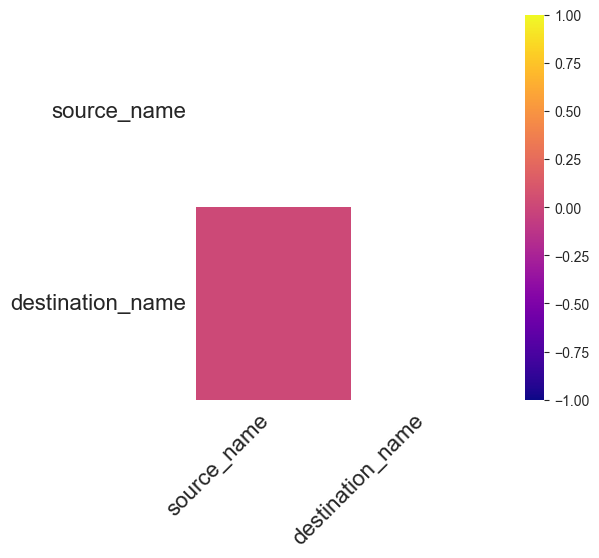

In [9]:
msng.heatmap(df,cmap='plasma',figsize=(5,5))

###  Handling Null Values
- Create a Reference list of Center Code and Center Name and Validated Result 
- Turns out There Few Center-ID With Null Values, Which resulted in the same result as Before

In [10]:
list_of_source_center = df.groupby(['source_center','source_name']).size().reset_index()
list_of_source_center = list_of_source_center.rename(columns={0: 'count','source_center':'center','source_name':'name'}).drop(columns=['count'])
list_of_source_center.sample(5)

,center,name
1102,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu)
672,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh)
452,IND362265AAA,Veraval_DC (Gujarat)
1210,IND700136AAG,Kolkata_Narynpur_C (West Bengal)
1012,IND591304AAA,Athani_VikrmMah_D (Karnataka)


In [11]:
list_of_destination_center = df.groupby(['destination_center','destination_name']).size().reset_index()
list_of_destination_center = list_of_destination_center.rename(columns={0: 'count','destination_center':'center','destination_name':'name'}).drop(columns=['count'])
list_of_destination_center.sample(5)

,center,name
644,IND443301AAA,Mehkar_SagarDPP_D (Maharashtra)
3,IND000000ABA,Cochin_Chtrpuza_D (Kerala)
1171,IND691506AAA,Kottarakkara_Amankovl_D (Kerala)
738,IND501301AAC,Ghatkesar_Central_D_1 (Telangana)
398,IND334001AAB,Bikaner_DC (Rajasthan)


In [12]:
center_lookup = pd.concat([list_of_source_center,list_of_destination_center],ignore_index=True)
center_lookup.drop_duplicates(inplace=True)
center_to_name = center_lookup.set_index('center')['name'].to_dict()

#### Method—1 Filling Values using Reference
- After Creating a Reference Table, we create a Dictionary 
- Later we apply the map function to the respective columns

In [13]:
center_to_name  # this is a dictionary of all the Center and Names
dict(zip(list(center_to_name.keys())[:5], list(center_to_name.values())[:5])) #Top 5 entries of this dictionary

{'IND000000AAL': 'Pune_PC (Maharashtra)',
 'IND000000AAQ': 'Barasat_KrshnNgr_D (West Bengal)',
 'IND000000AAS': 'Bongaigaon_Chpaguri_D (Assam)',
 'IND000000AAZ': 'Buldhana_Thsil3PL_D (Maharashtra)',
 'IND000000ABA': 'Cochin_Chtrpuza_D (Kerala)'}

In [14]:
df['source_name'] = df['source_center'].map(center_to_name)
df['destination_name'] = df['destination_center'].map(center_to_name)

#### Checking Null Values
- Turns out there are still Null Values 
- The Best way to move forward is to got with Method 2 i.e. Imputing using Mode

In [15]:
print(f"Are there any null values in dataset : {df.isna().any().any()}")

Are there any null values in dataset : True


Getting List of Center with null values 

In [16]:
null_source_center = pd.Series(df[df['source_name'].isna()]['source_center'].unique())
null_destination_center = pd.Series(df[df['destination_name'].isna()]['destination_center'].unique())

In [17]:
pd.DataFrame(pd.concat([null_source_center,null_destination_center],ignore_index=True)).rename(columns={0:"Null Centres"})

,Null Centres
0,IND342902A1B
1,IND577116AAA
2,IND282002AAD
3,IND465333A1B
4,IND841301AAC
5,IND509103AAC
6,IND126116AAA
7,IND331022A1B
8,IND505326AAB
9,IND852118A1B


#### Method 2 - Deleting Null Values 
- Reason Why we didn't went with impute is because if we decide to impute using mode , there would be an conflict with source code and destination code 

In [18]:
df = df.dropna()

#### Checking Null Values

In [19]:
print(f"Are there any NUll values in Dataset : {df.isna().any().any()}")

Are there any NUll values in Dataset : False


## Examining the Data Structure
- Analyzing the data types of the columns and implementing necessary corrections.
- Conduct a detailed overview of the columns.
- After Manipulating the Data and Adding Features, we have 14.7K rows and 28 Features (Columns)
## Data Wrangling Procedures
- The dataset contained several columns that required conversion from object data type to a datetime data type.
- The format of this dataset is wide with almost 19 features.
- This non-aggregated dataset is segmented with visible divisions between each segment. It's best to aggregate it 
- Columns like actual_time, osrm_time etc. are computed using a cumulative sum of columns like segment_actual_time, segment_osrm_time 
- To get started first, we did aggregation at segment level by creating a feature `unified_key` which is concatenation of Unique ID for a trip, source, destination.  This Activity reduced the dataset from 100K++ rows to 22K++ rows
- Changed column to of `start_scan_to_end_scan ` to `delivery duration` for better clarity of features
- We further did Aggregation at `trip_uuid` Level , further reducing table to just 14k rows

In [20]:
df.sample(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
98743,training,2018-09-19 12:22:07.301055,thanos::sroute:f3756bb4-745e-49f3-8608-5a88652...,FTL,trip-153735972730081305,IND231217AAA,Renukoot_Govind_D (Uttar Pradesh),IND231225AAB,Anpara_Parasi_D (Uttar Pradesh),2018-09-20 00:47:52.470055,2018-09-20 02:34:54.660986,107.0,22.310283,37.0,18.0,26.1620,37.0,18.0,26.1620
81497,training,2018-09-13 01:57:34.360771,thanos::sroute:828f0a4b-da11-4921-88df-5316ddb...,FTL,trip-153680385436053322,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND821115AAB,Sasaram_Central_I_2 (Bihar),2018-09-13 01:57:34.360771,2018-09-14 04:33:20.191753,1595.0,333.844903,574.0,252.0,352.3594,34.0,18.0,26.0369
59172,training,2018-09-21 22:54:20.579966,thanos::sroute:9cada9d8-0df2-48a3-8784-3cf5da9...,Carting,trip-153757046057972149,IND131021AAA,Sonipat_AmzonDev_V (Haryana),IND131028AAA,Sonipat_Kundli_P (Haryana),2018-09-21 22:54:20.579966,2018-09-21 23:45:38.614962,51.0,9.599419,16.0,9.0,10.7272,16.0,9.0,10.7272
95550,test,2018-09-29 01:44:54.654787,thanos::sroute:ea7ffec5-756e-450d-9fbf-9466b8e...,FTL,trip-153818549465453720,IND125001AAA,Hisar_ModelTwn_P (Haryana),IND110037AAM,Delhi_Airport_H (Delhi),2018-09-29 13:27:18.675388,2018-09-30 01:26:45.338559,719.0,44.375582,97.0,58.0,72.1650,45.0,31.0,33.1357
61770,test,2018-09-29 20:17:23.173937,thanos::sroute:55f92e5f-4e98-4f2c-944d-98aceb6...,FTL,trip-153825224317368975,IND852113AAA,Madhepura_Krishnpr_D (Bihar),IND852139AAB,Triveninganj_Central_D_1 (Bihar),2018-09-30 05:35:05.320994,2018-09-30 07:19:57.676516,104.0,21.031925,62.0,28.0,36.7003,62.0,28.0,36.7003


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  actual_distance_to_de

Converting dtype from Object to Datetime 

In [22]:
cols = ['trip_creation_time','od_start_time','od_end_time']

for col in cols:
    temp = pd.to_datetime(df[col], format="%Y-%m-%d %H:%M:%S.%f", errors='coerce')
    if temp.isnull().any():
        df[col] = pd.to_datetime(df[col], format="%Y-%m-%d %H:%M:%S", errors='coerce')
    else:
        df[col] = temp

creating a segment key

In [23]:
df['unified_key'] = df['trip_uuid']+ " " + df['source_center'] + " " +df['destination_center']
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,unified_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320 IND388121AAA IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320 IND388121AAA IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320 IND388121AAA IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320 IND388121AAA IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320 IND388121AAA IND388620AAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,trip-153746066843555182 IND131028AAB IND000000ACB
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,trip-153746066843555182 IND131028AAB IND000000ACB
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,trip-153746066843555182 IND131028AAB IND000000ACB
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,trip-153746066843555182 IND131028AAB IND000000ACB


Rename Column to get better Understanding

In [24]:
df.rename(columns={'start_scan_to_end_scan':'delivery_duration'},inplace=True)

Grouping BY Unified Key   

In [26]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'delivery_duration' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',

}

In [27]:
df = df.groupby('unified_key').agg(create_segment_dict).sort_values(by=['unified_key','od_end_time'], ascending=True).reset_index()

In [29]:
df

,unified_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,delivery_duration,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,trip-153671041653548748 IND209304AAA IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748 IND462022AAA IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164 IND561203AAB IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164 IND572101AAA IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517 IND000000ACB IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069 IND628204AAA IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26218,trip-153861115439069069 IND628613AAA IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26219,trip-153861115439069069 IND628801AAA IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26220,trip-153861118270144424 IND583119AAA IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [30]:
df[df['trip_uuid'] == 'trip-153671041653548748']

,unified_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,delivery_duration,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,trip-153671041653548748 IND209304AAA IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748 IND462022AAA IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0


In [31]:
df['od_time_diff_hour'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60

Now we Can do Another Aggregation at Trip Uid Level

In [32]:
df

,unified_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,od_end_time,delivery_duration,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff_hour
0,trip-153671041653548748 IND209304AAA IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421
1,trip-153671041653548748 IND462022AAA IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379
2,trip-153671042288605164 IND561203AAB IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388
3,trip-153671042288605164 IND572101AAA IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486
4,trip-153671043369099517 IND000000ACB IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069 IND628204AAA IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0,62.115193
26218,trip-153861115439069069 IND628613AAA IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0,91.087797
26219,trip-153861115439069069 IND628801AAA IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),...,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0,44.174403
26220,trip-153861118270144424 IND583119AAA IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0,287.474007


In [33]:
trip_agg = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'od_time_diff_hour' : 'sum',
    'delivery_duration' : 'sum',
    
    'actual_distance_to_destination' : 'sum',
    
    'actual_time' : 'sum',
    'segment_actual_time' : 'sum',
    
    'osrm_time' : 'sum',
    'segment_osrm_time' : 'sum',
    
    'osrm_distance' : 'sum',
    'segment_osrm_distance' : 'sum',

}

In [34]:
df = df.groupby('trip_uuid').agg(trip_agg).reset_index(drop = True)

### Feature Engineer
- Feature Engineered `od_time_diff_hour` by calculating difference b/w `od_end_time` and `od_start_time` and it is similar to `delivery duration`
- Creating new Date Time Columns from `trip_creating_feature`
- Fetching Names of Cities, States, Places from `destination_name` and `source_name`

In [35]:
df['trip_year'] = df['trip_creation_time'].dt.year
df['trip_month'] = df['trip_creation_time'].dt.month
df['trip_hour'] = df['trip_creation_time'].dt.hour
df['trip_day'] = df['trip_creation_time'].dt.day
df['trip_week'] = df['trip_creation_time'].dt.isocalendar().week
df['trip_dayofweek'] = df['trip_creation_time'].dt.dayofweek
df[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


In [36]:
def state_name(x) :
    return x.split('(')[1].replace(")","")
def city_name(x) :
    return x.split("(")[0].split("_")[0]
def place_name(x) :
    x = x.split('(')[0]
    len_ = len(x.split('_'))
    if len_ >=3 :
        return x.split("_")[1]
    if len_ == 2 :
        return x.split('_')[0]
    return x.split(' ')[0]

In [37]:
df['source_state'] = df['source_name'].apply(lambda x: state_name(x))
df['destination_state'] = df['destination_name'].apply(lambda x: state_name(x))
df['source_city']= df['source_name'].apply(lambda x: city_name(x))
df['destination_city']= df['destination_name'].apply(lambda x: city_name(x))
df['source_place'] = df['source_name'].apply(lambda x: place_name(x))
df['destination_place'] = df['destination_name'].apply(lambda x: place_name(x))

# Exploratory Data Analysis
- This Dataset is for the year 2018 from the Month of September to October 
- Average and Median Duration for a trip is approximately  530 hrs, 239hrs

In [38]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_time_diff_hour,...,trip_hour,trip_day,trip_week,trip_dayofweek,source_state,destination_state,source_city,destination_city,source_place,destination_place
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2260.109800,...,0,12,37,2,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,Central,Central
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),181.611874,...,0,12,37,2,Karnataka,Karnataka,Doddablpur,Doddablpur,ChikaDPP,ChikaDPP
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3934.362520,...,0,12,37,2,Haryana,Haryana,Gurgaon,Gurgaon,Bilaspur,Bilaspur
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.494935,...,0,12,37,2,Maharashtra,Maharashtra,Mumbai Hub,Mumbai,Mumbai,MiraRd
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),718.349042,...,0,12,37,2,Karnataka,Karnataka,Bellary,Sandur,Bellary,WrdN1DPP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),258.028928,...,23,3,40,2,Punjab,Punjab,Chandigarh,Chandigarh,Mehmdpur,Mehmdpur
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.590521,...,23,3,40,2,Haryana,Haryana,FBD,Faridabad,Balabhgarh,Blbgarh
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),422.119867,...,23,3,40,2,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,GovndNgr,GovndNgr
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),348.512862,...,23,3,40,2,Tamil Nadu,Tamil Nadu,Tirunelveli,Tirchchndr,VdkkuSrt,Shnmgprm


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  object        
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   od_time_diff_hour               14787 non-null  float64       
 10  delivery_duration               14787 non-null  float64       
 11  ac

In [40]:
print(f"Are there any Null Values : {df.isna().any().any()}")

Are there any Null Values : False


In [41]:
df.describe()

,trip_creation_time,od_time_diff_hour,delivery_duration,actual_distance_to_destination,actual_time,segment_actual_time,osrm_time,segment_osrm_time,osrm_distance,segment_osrm_distance,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
count,14787,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.0,14787.000000,14787.000000,14787.000000,14787.0,14787.000000
mean,2018-09-22 12:26:28.269885696,530.313517,529.429025,164.090196,356.306012,353.059174,160.990938,180.511598,203.887411,222.705466,2018.0,9.120105,12.456212,18.375127,38.293907,2.920944
min,2018-09-12 00:00:16.535741,23.461468,23.000000,9.002461,9.000000,9.000000,6.000000,6.000000,9.072900,9.072900,2018.0,9.000000,0.000000,1.000000,37.0,0.000000
25%,2018-09-17 02:38:18.128431872,149.698496,149.000000,22.777099,67.000000,66.000000,29.000000,30.000000,30.756900,32.578850,2018.0,9.000000,4.000000,14.000000,38.0,1.000000
50%,2018-09-22 03:39:19.609193984,279.710750,279.000000,48.287894,148.000000,147.000000,60.000000,65.000000,65.302800,69.784200,2018.0,9.000000,14.000000,19.000000,38.0,3.000000
75%,2018-09-27 19:23:14.074359552,633.537697,632.000000,163.591258,367.000000,364.000000,168.000000,184.000000,206.644200,216.560600,2018.0,9.000000,20.000000,25.000000,39.0,5.000000
max,2018-10-03 23:59:42.701692,7898.551955,7898.000000,2186.531787,6265.000000,6230.000000,2032.000000,2564.000000,2840.081000,3523.632400,2018.0,10.000000,23.000000,30.000000,40.0,6.000000
std,NaN,658.415490,658.254936,305.502982,561.517936,556.365911,271.459495,314.679279,370.565564,416.846279,0.0,0.325096,7.987387,7.882198,0.967366,1.927690


In [42]:
df.describe(include='object')

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,source_state,destination_state,source_city,destination_city,source_place,destination_place
count,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787
unique,2,1497,2,14787,930,930,1035,1035,29,31,731,856,770,874
top,training,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,trip-153671041653548748,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Maharashtra,Maharashtra,Gurgaon,Bengaluru,Bilaspur,Bilaspur
freq,10645,53,8906,1,1052,1052,821,821,2714,2561,1128,1088,1074,864


In [223]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_time_diff_hour,...,trip_hour,trip_day,trip_week,trip_dayofweek,destination_state,source_state,destination_city,source_city,destination_place,source_place
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2260.109800,...,0,12,37,2,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,Central,Central
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),181.611874,...,0,12,37,2,Karnataka,Karnataka,Doddablpur,Doddablpur,ChikaDPP,ChikaDPP
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3934.362520,...,0,12,37,2,Haryana,Haryana,Gurgaon,Gurgaon,Bilaspur,Bilaspur
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.494935,...,0,12,37,2,Maharashtra,Maharashtra,Mumbai,Mumbai Hub,MiraRd,Mumbai
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),718.349042,...,0,12,37,2,Karnataka,Karnataka,Sandur,Bellary,WrdN1DPP,Bellary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),258.028928,...,23,3,40,2,Punjab,Punjab,Chandigarh,Chandigarh,Mehmdpur,Mehmdpur
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.590521,...,23,3,40,2,Haryana,Haryana,Faridabad,FBD,Blbgarh,Balabhgarh
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),422.119867,...,23,3,40,2,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,GovndNgr,GovndNgr
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),348.512862,...,23,3,40,2,Tamil Nadu,Tamil Nadu,Tirchchndr,Tirunelveli,Shnmgprm,VdkkuSrt
